# 실습1. 경사하강법 (단층)

In [ ]:
##############################################
# tf1.x - 당뇨데이터 (이진분류)
##############################################
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/data/data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = data[:, :-1]
y_data = data[:, -1]

# Placeholder 정의 : Shape에 주의! 총 X:(N, 8) Y: (N,)
X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=None)

# Variable (tensor) 정의 (업데이트 할 변수들) - 초기값 설정 (random)
W = tf.Variable(tf.random_normal([8, 1]), )  # tf2.x -> tf.random.normal
b = tf.Variable(tf.random_normal([1]))  # broadcasting예정

# 가설(hypothesis) 정의 : 2진 분류 (sigmoid)
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
# hypothesis = 1 / (1 + tf.exp(- (tf.matmul(X, W) + b)))  # sigmoid함수 정의

# Loss(Cost)함수 정의
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

# Hyper Parameter 정의
lr = 0.05
epochs = 3000

# Optimizer 정의 (경사하강법, 학습률)
train = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cost)

# 정확도 평가 hypothesis(sigmoid) > 0.5 -> 1 else 0
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

history = {'loss': [], 'accuracy': []}
# 세션 시작! (학습)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())  # Variable이 있다면 반드시 variable 초기화!!!

    for step in range(epochs):
        cost_val, _, h, p, a = sess.run([cost, train, hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})    # 학습
        history['loss'].append(cost_val)
        history['accuracy'].append(a)
        if step % 100 == 0:
            print(step, a, sep='\t')

    # 정확도 77%
    h, p, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    #a = sess.run(accuracy, feed_dict={X: x_data, Y: y_data}) 같이 해도 문제는 안됨
    #grph가 구성되어 있으므로
    print("Accuracy: ", a)
    # Accuracy: 0.769433

    W_val, b_val = sess.run([W, b], feed_dict={X: x_data, Y:y_data})


0	0.45854315
100	0.6154725
200	0.6239661
300	0.6296285
400	0.6328641
500	0.63650423
600	0.6377176
700	0.63933545
800	0.6413577
900	0.64297557
1000	0.64459336
1100	0.6462112
1200	0.6474246
1300	0.64782906
1400	0.6482335
1500	0.64863795
1600	0.6490424
1700	0.64944685
1800	0.6510647
1900	0.6518736
2000	0.6518736
2100	0.6518736
2200	0.65268254
2300	0.65268254
2400	0.65308696
2500	0.65308696
2600	0.65308696
2700	0.65349144
2800	0.65349144
2900	0.65349144
Accuracy:  0.65349144


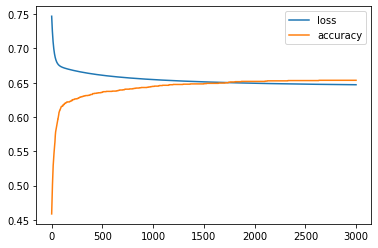

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df_history = pd.DataFrame(history)
df_history.plot()
plt.show()

In [ ]:
# 파라미터 값
print('W >\n', W_val)
print('b >\n', b_val)

W >
 [[-0.04127072]
 [ 0.1238573 ]
 [ 0.23917271]
 [-0.29699335]
 [ 0.0334263 ]
 [ 0.18792304]
 [-0.30342194]
 [-0.07212781]]
b >
 [0.2281755]


# 퍼셉트론의 과제(AND 연산)

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [0], [0], [1]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2], name='x-input')
Y = tf.placeholder(tf.float32, [None, 1], name='y-input')

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([]), name='bias')

# Hyper Parameter 정하기
epochs = 1000
lr = 0.1
#활성화 함수(hypothesis : 가설)
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cost)
# 예측값 결과 계산 및 Accuracy 계산
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
# Launch graph
with tf.Session() as sess:
   # TensorFlow variables 초기화
   sess.run(tf.global_variables_initializer())
   for step in range(epochs + 1):
       sess.run(train, feed_dict={X: x_data, Y: y_data})
       if step % 100 == 0:
           W_, b_, cost_, a_ = sess.run([W, b, cost, accuracy],
                                          feed_dict={X: x_data, Y: y_data})
           print("step = ", step,
                 "\tW = ", W_.flatten().round(4),
                 "\tb = ", b_.round(4),
                 "\tAccuracy = ", a_)

   # Accuracy report
   h, p, a = sess.run([hypothesis, predicted, accuracy],
                      feed_dict={X: x_data, Y: y_data})
   print("\nHypothesis:\n", h, "\nPredicted:\n", p, "\nAccuracy:\n", a, sep='')


step =  0 	W =  [ 1.6188 -0.7765] 	b =  0.3917 	Accuracy =  0.5
step =  100 	W =  [ 1.2698 -0.1119] 	b =  -1.3554 	Accuracy =  0.75
step =  200 	W =  [1.4905 0.6654] 	b =  -2.0169 	Accuracy =  1.0
step =  300 	W =  [1.7249 1.2196] 	b =  -2.5391 	Accuracy =  1.0
step =  400 	W =  [1.9536 1.6354] 	b =  -2.9827 	Accuracy =  1.0
step =  500 	W =  [2.1721 1.9661] 	b =  -3.3698 	Accuracy =  1.0
step =  600 	W =  [2.3782 2.2413] 	b =  -3.7143 	Accuracy =  1.0
step =  700 	W =  [2.5713 2.4782] 	b =  -4.025 	Accuracy =  1.0
step =  800 	W =  [2.752  2.6872] 	b =  -4.3084 	Accuracy =  1.0
step =  900 	W =  [2.9209 2.875 ] 	b =  -4.569 	Accuracy =  1.0
step =  1000 	W =  [3.0792 3.046 ] 	b =  -4.8104 	Accuracy =  1.0

Hypothesis:
[[0.00807894]
 [0.1462374 ]
 [0.15043221]
 [0.7883062 ]]
Predicted:
[[0.]
 [0.]
 [0.]
 [1.]]
Accuracy:
1.0


# 퍼셉트론의 과제(OR연산)

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [1]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2], name='x-input')
Y = tf.placeholder(tf.float32, [None, 1], name='y-input')

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([]), name='bias')

# Hyper Parameter 정하기
epochs = 1000
lr = 0.1
#활성화 함수(hypothesis : 가설)
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cost)
# 예측값 결과 계산 및 Accuracy 계산
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
# Launch graph
with tf.Session() as sess:
   # TensorFlow variables 초기화
   sess.run(tf.global_variables_initializer())
   for step in range(epochs + 1):
       sess.run(train, feed_dict={X: x_data, Y: y_data})
       if step % 100 == 0:
           W_, b_, cost_, a_ = sess.run([W, b, cost, accuracy],
                                          feed_dict={X: x_data, Y: y_data})
           print("step = ", step,
                 "\tW = ", W_.flatten().round(4),
                 "\tb = ", b_.round(4),
                 "\tAccuracy = ", a_)

   # Accuracy report
   h, p, a = sess.run([hypothesis, predicted, accuracy],
                      feed_dict={X: x_data, Y: y_data})
   print("\nHypothesis:\n", h, "\nPredicted:\n", p, "\nAccuracy:\n", a, sep='')


step =  0 	W =  [0.9231 0.219 ] 	b =  1.5072 	Accuracy =  0.75
step =  100 	W =  [1.3582 0.838 ] 	b =  0.5785 	Accuracy =  0.75
step =  200 	W =  [1.8042 1.4323] 	b =  0.0644 	Accuracy =  0.75
step =  300 	W =  [2.2018 1.932 ] 	b =  -0.2841 	Accuracy =  1.0
step =  400 	W =  [2.5519 2.3511] 	b =  -0.5476 	Accuracy =  1.0
step =  500 	W =  [2.862  2.7088] 	b =  -0.7598 	Accuracy =  1.0
step =  600 	W =  [3.1391 3.0193] 	b =  -0.9374 	Accuracy =  1.0
step =  700 	W =  [3.3888 3.2932] 	b =  -1.0904 	Accuracy =  1.0
step =  800 	W =  [3.6155 3.5378] 	b =  -1.2247 	Accuracy =  1.0
step =  900 	W =  [3.8227 3.7585] 	b =  -1.3444 	Accuracy =  1.0
step =  1000 	W =  [4.0132 3.9594] 	b =  -1.4523 	Accuracy =  1.0

Hypothesis:
[[0.18964581]
 [0.92463905]
 [0.9283007 ]
 [0.99852896]]
Predicted:
[[0.]
 [1.]
 [1.]
 [1.]]
Accuracy:
1.0


# 퍼셉트론의 과제(XOR 연산)


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2], name='x-input')
Y = tf.placeholder(tf.float32, [None, 1], name='y-input')

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([]), name='bias')

# Hyper Parameter 정하기
epochs = 1000
lr = 0.1
#활성화 함수(hypothesis : 가설)
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cost)
# 예측값 결과 계산 및 Accuracy 계산
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
# Launch graph
with tf.Session() as sess:
   # TensorFlow variables 초기화
   sess.run(tf.global_variables_initializer())
   for step in range(epochs + 1):
       sess.run(train, feed_dict={X: x_data, Y: y_data})
       if step % 100 == 0:
           W_, b_, cost_, a_ = sess.run([W, b, cost, accuracy],
                                          feed_dict={X: x_data, Y: y_data})
           print("step = ", step,
                 "\tW = ", W_.flatten().round(4),
                 "\tb = ", b_.round(4),
                 "\tAccuracy = ", a_)

   # Accuracy report
   h, p, a = sess.run([hypothesis, predicted, accuracy],
                      feed_dict={X: x_data, Y: y_data})
   print("\nHypothesis:\n", h, "\nPredicted:\n", p, "\nAccuracy:\n", a, sep='')


step =  0 	W =  [-0.9138  0.1843] 	b =  0.0693 	Accuracy =  0.5
step =  100 	W =  [-0.4597  0.133 ] 	b =  0.1873 	Accuracy =  0.5
step =  200 	W =  [-0.2676  0.0499] 	b =  0.1291 	Accuracy =  0.5
step =  300 	W =  [-0.1584  0.0114] 	b =  0.0872 	Accuracy =  0.5
step =  400 	W =  [-0.095  -0.0043] 	b =  0.0588 	Accuracy =  0.5
step =  500 	W =  [-0.0577 -0.0093] 	b =  0.0397 	Accuracy =  0.5
step =  600 	W =  [-0.0355 -0.0097] 	b =  0.0268 	Accuracy =  0.5
step =  700 	W =  [-0.0222 -0.0083] 	b =  0.0181 	Accuracy =  0.5
step =  800 	W =  [-0.014  -0.0066] 	b =  0.0122 	Accuracy =  0.5
step =  900 	W =  [-0.0089 -0.005 ] 	b =  0.0082 	Accuracy =  0.5
step =  1000 	W =  [-0.0057 -0.0036] 	b =  0.0056 	Accuracy =  0.5

Hypothesis:
[[0.5013912 ]
 [0.5004819 ]
 [0.49995476]
 [0.49904546]]
Predicted:
[[1.]
 [1.]
 [0.]
 [0.]]
Accuracy:
0.5


## XOR연산 layer 2층으로

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [0], [0], [1]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2], name='x-input')
Y = tf.placeholder(tf.float32, [None, 1], name='y-input')

W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# Hyper Parameter 정하기
epochs = 1000
lr = 0.1

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cost)

# 예측값 결과 계산 및 Accuracy 계산
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

history = {'loss': [], 'accuracy': []}
# Launch graph
with tf.Session() as sess:
   # TensorFlow variables 초기화
   sess.run(tf.global_variables_initializer())
   for step in range(epochs + 1):
       sess.run(train, feed_dict={X: x_data, Y: y_data})

       W1_, b1_, cost_, a_ = sess.run([W1, b1, cost, accuracy],
                                          feed_dict={X: x_data, Y: y_data})

       history['loss'].append(cost_)
       history['accuracy'].append(a_)


       if step % 100 == 0:

           print("step = ", step,
                 "\tW1 = ", W1_.flatten().round(4),
                 "\tb1 = ", b1_.round(4),
                 "\tAccuracy = ", a_)

   # Accuracy report
   h, p, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
   print("\nHypothesis:\n", h, "\nPredicted:\n", p, "\nAccuracy:\n", a, sep='')


step =  0 	W1 =  [-0.9515  0.1683  0.8062  0.4056] 	b1 =  [-1.1967 -1.4045] 	Accuracy =  0.75
step =  100 	W1 =  [-1.0847  0.1018  0.7032  0.339 ] 	b1 =  [-1.2371 -1.4428] 	Accuracy =  0.75
step =  200 	W1 =  [-1.1929  0.0959  0.6394  0.3332] 	b1 =  [-1.2165 -1.4446] 	Accuracy =  0.75
step =  300 	W1 =  [-1.3086  0.1179  0.5799  0.3553] 	b1 =  [-1.17   -1.4398] 	Accuracy =  0.75
step =  400 	W1 =  [-1.4358  0.1696  0.5218  0.408 ] 	b1 =  [-1.0972 -1.4278] 	Accuracy =  0.75
step =  500 	W1 =  [-1.5749  0.2615  0.4662  0.5036] 	b1 =  [-0.9916 -1.4035] 	Accuracy =  0.75
step =  600 	W1 =  [-1.7255  0.411   0.4141  0.6638] 	b1 =  [-0.8462 -1.3608] 	Accuracy =  0.75
step =  700 	W1 =  [-1.8857  0.6246  0.3672  0.905 ] 	b1 =  [-0.655  -1.3104] 	Accuracy =  0.75
step =  800 	W1 =  [-2.0501  0.851   0.3244  1.1942] 	b1 =  [-0.4224 -1.3116] 	Accuracy =  0.75
step =  900 	W1 =  [-2.2129  1.0196  0.2772  1.4761] 	b1 =  [-0.1742 -1.4142] 	Accuracy =  0.75
step =  1000 	W1 =  [-2.3671  1.1217  0.21

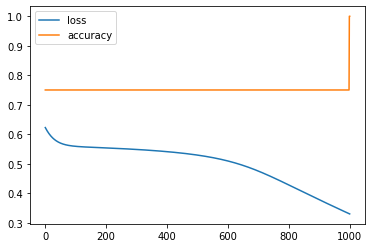

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df_history = pd.DataFrame(history)
df_history.plot()
plt.show()

# Tensor 은닉층 3층으로 node 5개로 설정하기
* 내 설정 입력층(2) 은닉1층(4) 은닉2층(5) 은닉3층(3) 출력(1)

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [0], [0], [1]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2], name='x-input')
Y = tf.placeholder(tf.float32, [None, 1], name='y-input')

W1 = tf.Variable(tf.random_normal([2, 4]), name='weight1')
b1 = tf.Variable(tf.random_normal([4]), name='bias1')
z1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([4, 5]), name='weight2')
b2 = tf.Variable(tf.random_normal([5]), name='bias2')
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

W3 = tf.Variable(tf.random_normal([5, 3]), name='weight3')
b3 = tf.Variable(tf.random_normal([3]), name='bias3')
z3 = tf.sigmoid(tf.matmul(z2, W3) + b3)

W4 = tf.Variable(tf.random_normal([3, 1]), name='weight4')
b4 = tf.Variable(tf.random_normal([]), name='bias4')
hypothesis = tf.sigmoid(tf.matmul(z3, W4) + b4)

# Hyper Parameter 정하기
epochs = 2000
lr = 0.3

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cost)

# 예측값 결과 계산 및 Accuracy 계산
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

history = {'loss': [], 'accuracy': []}
# Launch graph
with tf.Session() as sess:
   # TensorFlow variables 초기화
   sess.run(tf.global_variables_initializer())
   for step in range(epochs + 1):
       sess.run(train, feed_dict={X: x_data, Y: y_data})

       W1_, b1_, cost_, a_ = sess.run([W1, b1, cost, accuracy],
                                          feed_dict={X: x_data, Y: y_data})

       history['loss'].append(cost_)
       history['accuracy'].append(a_)


       if step % 100 == 0:

           print("step = ", step,
                 "\tW1 = ", W1_.flatten().round(4),
                 "\tb1 = ", b1_.round(4),
                 "\tAccuracy = ", a_)

   # Accuracy report
   h, p, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
   print("\nHypothesis:\n", h, "\nPredicted:\n", p, "\nAccuracy:\n", a, sep='')


step =  0 	W1 =  [-1.4565  0.0919 -1.5381  1.818   0.6328 -2.2694 -0.9985 -0.338 ] 	b1 =  [ 0.454  -0.7543 -0.5736 -1.9299] 	Accuracy =  0.25
step =  100 	W1 =  [-1.3269  0.1017 -1.5473  1.661   0.7645 -2.2842 -0.9919 -0.5512] 	b1 =  [ 0.4822 -0.7044 -0.492  -2.0089] 	Accuracy =  0.75
step =  200 	W1 =  [-1.1704  0.1125 -1.5661  1.5346  0.9313 -2.3071 -0.985  -0.7323] 	b1 =  [ 0.5332 -0.6402 -0.3699 -2.0764] 	Accuracy =  0.75
step =  300 	W1 =  [-0.9744  0.1281 -1.6012  1.4349  1.1571 -2.3433 -0.9745 -0.8916] 	b1 =  [ 0.5884 -0.5445 -0.1712 -2.1202] 	Accuracy =  0.75
step =  400 	W1 =  [-0.7412  0.1514 -1.6813  1.3498  1.4636 -2.4074 -0.9502 -1.0452] 	b1 =  [ 0.6032 -0.3874  0.1826 -2.1456] 	Accuracy =  0.75
step =  500 	W1 =  [-0.5071  0.1728 -1.9289  1.2689  1.8281 -2.5254 -0.8528 -1.2028] 	b1 =  [ 0.5076 -0.1481  0.8103 -2.1639] 	Accuracy =  0.75
step =  600 	W1 =  [-0.3383  0.168  -2.5085  1.1998  2.1345 -2.6777 -0.7346 -1.3445] 	b1 =  [ 0.3377  0.0884  1.5224 -2.1842] 	Accuracy = 

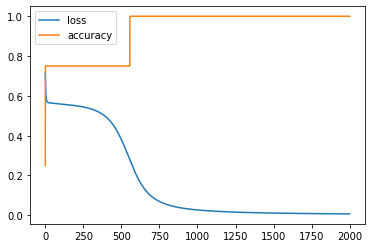

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df_history = pd.DataFrame(history)
df_history.plot()
plt.show()

# 기울기 소실의 문제



In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [0], [0], [1]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2], name='x-input')
Y = tf.placeholder(tf.float32, [None, 1], name='y-input')

W1 = tf.Variable(tf.random_normal([2, 4]), name='weight1')
b1 = tf.Variable(tf.random_normal([4]), name='bias1')
z1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([4, 5]), name='weight2')
b2 = tf.Variable(tf.random_normal([5]), name='bias2')
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

W3 = tf.Variable(tf.random_normal([5, 5]), name='weight3')
b3 = tf.Variable(tf.random_normal([5]), name='bias3')
z3 = tf.sigmoid(tf.matmul(z2, W3) + b3)

W4 = tf.Variable(tf.random_normal([5, 5]), name='weight4')
b4 = tf.Variable(tf.random_normal([5]), name='bias4')
z4 = tf.sigmoid(tf.matmul(z3, W4) + b4)

W5 = tf.Variable(tf.random_normal([5, 5]), name='weight5')
b5 = tf.Variable(tf.random_normal([5]), name='bias5')
z5 = tf.sigmoid(tf.matmul(z4, W5) + b5)

W6 = tf.Variable(tf.random_normal([5, 5]), name='weight6')
b6 = tf.Variable(tf.random_normal([5]), name='bias6')
z6 = tf.sigmoid(tf.matmul(z5, W6) + b6)

W7 = tf.Variable(tf.random_normal([5, 3]), name='weight7')
b7 = tf.Variable(tf.random_normal([3]), name='bias7')
z7 = tf.sigmoid(tf.matmul(z6, W7) + b7)

W8 = tf.Variable(tf.random_normal([3, 1]), name='weight8')
b8 = tf.Variable(tf.random_normal([]), name='bias8')
hypothesis = tf.sigmoid(tf.matmul(z7, W8) + b8)

# Hyper Parameter 정하기
epochs = 2000
lr = 0.3

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cost)

# 예측값 결과 계산 및 Accuracy 계산
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

history = {'loss': [], 'accuracy': []}
# Launch graph
with tf.Session() as sess:
   # TensorFlow variables 초기화
   sess.run(tf.global_variables_initializer())
   for step in range(epochs + 1):
       sess.run(train, feed_dict={X: x_data, Y: y_data})

       W1_, b1_, cost_, a_ = sess.run([W1, b1, cost, accuracy],
                                          feed_dict={X: x_data, Y: y_data})

       history['loss'].append(cost_)
       history['accuracy'].append(a_)


       if step % 100 == 0:

           print("step = ", step,
                 "\tW1 = ", W1_.flatten().round(4),
                 "\tb1 = ", b1_.round(4),
                 "\tAccuracy = ", a_)

   # Accuracy report
   h, p, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
   print("\nHypothesis:\n", h, "\nPredicted:\n", p, "\nAccuracy:\n", a, sep='')


step =  0 	W1 =  [ 1.262   1.1251  0.3069 -0.6306  1.0202 -0.4634  0.9958  0.5953] 	b1 =  [ 0.4067  0.0089 -0.9295 -0.3182] 	Accuracy =  0.25
step =  100 	W1 =  [ 1.262   1.1251  0.307  -0.6307  1.0202 -0.4634  0.9959  0.5953] 	b1 =  [ 0.4067  0.0088 -0.9296 -0.3182] 	Accuracy =  0.75
step =  200 	W1 =  [ 1.262   1.1252  0.3071 -0.6307  1.0202 -0.4634  0.996   0.5952] 	b1 =  [ 0.4066  0.0088 -0.9296 -0.3181] 	Accuracy =  0.75
step =  300 	W1 =  [ 1.262   1.1252  0.3072 -0.6308  1.0202 -0.4634  0.9961  0.5952] 	b1 =  [ 0.4066  0.0088 -0.9296 -0.3181] 	Accuracy =  0.75
step =  400 	W1 =  [ 1.262   1.1252  0.3073 -0.6308  1.0202 -0.4634  0.9962  0.5951] 	b1 =  [ 0.4065  0.0087 -0.9296 -0.3181] 	Accuracy =  0.75
step =  500 	W1 =  [ 1.262   1.1252  0.3074 -0.6309  1.0202 -0.4634  0.9963  0.5951] 	b1 =  [ 0.4065  0.0087 -0.9296 -0.3181] 	Accuracy =  0.75
step =  600 	W1 =  [ 1.262   1.1252  0.3075 -0.6309  1.0202 -0.4635  0.9964  0.5951] 	b1 =  [ 0.4064  0.0087 -0.9297 -0.3181] 	Accuracy = 

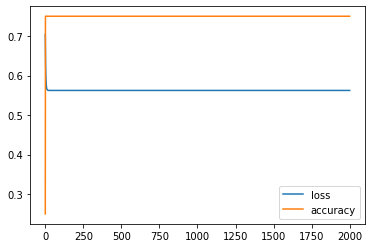

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df_history = pd.DataFrame(history)
df_history.plot()
plt.show()

In [ ]:
import tensorflow as tf
tf.__version__

'2.9.2'